##Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import files
files.upload()

Saving credit_data.csv to credit_data.csv


{'credit_data.csv': b'clientid,income,age,loan,default\r\n1,66155.9250950813,59.017015066929204,8106.53213128514,0\r\n2,34415.1539658196,48.11715310486029,6564.745017677379,0\r\n3,57317.1700630337,63.10804949188599,8020.953296386469,0\r\n4,42709.534200839706,45.751972352154596,6103.642260140699,0\r\n5,66952.68884534019,18.5843359269202,8770.09923520439,1\r\n6,24904.064140282597,57.4716071025468,15.498598437827198,0\r\n7,48430.3596126847,26.809132419060898,5722.58198121271,0\r\n8,24500.1419843175,32.8975483207032,2971.00330971188,1\r\n9,40654.8925372772,55.496852539479704,4755.8252798016,0\r\n10,25075.872770976297,39.7763780555688,1409.23037111453,0\r\n11,64131.4153722487,25.679575353860898,4351.0289707232505,0\r\n12,59436.847122851796,60.4719358547591,9254.24453803174,0\r\n13,61050.3460792825,26.3550438545644,5893.26465933928,0\r\n14,27267.9954580963,61.576775823254096,4759.7875810455,0\r\n15,63061.960174236396,39.2015528911725,1850.36937703064,0\r\n16,50501.7266888171,-28.218361321371

##Data Exploration

In [3]:
data = pd.read_csv('credit_data.csv')
data

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


##Data Visualization

In [5]:
np.unique(data.default, return_counts=True)

(array([0, 1]), array([1717,  283]))

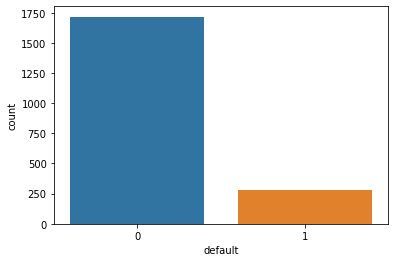

In [6]:
sns.countplot(x = data.default);

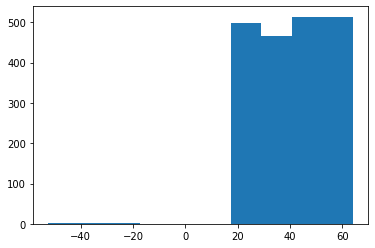

In [7]:
plt.hist(x = data.age);

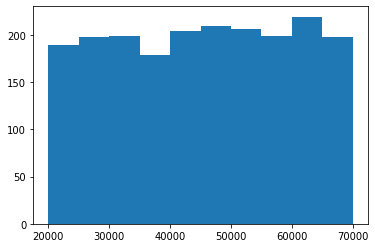

In [8]:
plt.hist(x = data.income);

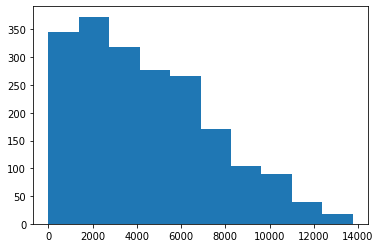

In [9]:
plt.hist(x = data.loan);

In [10]:
px.scatter_matrix(data, dimensions = ['age', 'income', 'loan'], color = 'default').show()

##Inconsistent Data

###Inconsistent Age

In [11]:
data.loc[data.age < 0] # Similar: data[data.age < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


###Inconsistent Age - Drop Row

In [12]:
age = data.drop(data[data.age < 0].index)
age.loc[data.age < 0]

,clientid,income,age,loan,default


###Inconsistent Age - Replace Age - Better Way

In [13]:
mean = data.age[data.age > 0].mean()
mean

40.92770044906149

In [14]:
data.loc[data.age < 0, 'age'] = mean

In [15]:
data.loc[data.age < 0]

,clientid,income,age,loan,default


##Missing Values

In [16]:
data.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [17]:
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [18]:
data[pd.isnull(data.age)]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [19]:
data.age.fillna(data.age.mean(), inplace = True)
data[pd.isnull(data.age)]

,clientid,income,age,loan,default


In [20]:
data[data.clientid.isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


###Split Predictors and Classes

In [21]:
X_data = data.iloc[:, 1:4].values
X_data

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [22]:
y_data = data.iloc[:, 4].values
y_data

array([0, 0, 0, ..., 1, 0, 0])

##Value Scaling - Features With The Same Scale

In [23]:
X_data[:,0].min(), X_data[:,1].min(), X_data[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [24]:
X_data[:,0].max(), X_data[:,1].max(), X_data[:,2].max()

(69995.6855783239, 63.97179584112021, 13766.051239333701)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [26]:
X_data[:,0].min(), X_data[:,1].min(), X_data[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [27]:
X_data[:,0].max(), X_data[:,1].max(), X_data[:,2].max()

(1.7220222385319197, 1.7393665201515687, 3.0616609141708273)

###Training and Test - Split

In [28]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size = 0.25)

In [29]:
X_data_train.shape

(1500, 3)

##Save Variables

In [ ]:
import pickle

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_data_train, X_data_test, y_data_train, y_data_test], f)